# Data preparation

### Loading libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading data

In [14]:
csvpath = r"data\vgsales.csv"
sales_df = pd.read_csv(csvpath, delimiter= ",")

# display basic info about the dataset
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Data preprocessing

In [15]:
# check any missing values
sales_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

* We have 271 years not referenced and 58 not referenced publishers. They represent a very small portion and the goal is to indentify trends and patterns so we can eliminate them.

In [16]:
# drop all missing values from the dataset
sales_df = sales_df.dropna()

# check the removal of the values
sales_df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [17]:
sales_df['Year']= sales_df['Year'].astype(int)

In [18]:
sales_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


* The data range from 1980 to 2020
* There seems to have a big impact from games that are not much sold. There is a vast gap between the 75% - max values

In [19]:
sales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [20]:
sales_df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


* The data is ranked based on global sales

# Market Analysis

## Best-selling video games

* Gives a state of the market with trends with favorite games, favorite genres
* How do sales in one region correlate with sales in other regions?
* How does publishing year impact the sales?

In [142]:
# analyze which countries make up the largest and smallest portion of the sales
def percent(answer):
    print(round(sales_df[answer].sum()/sales_df['Global_Sales'].sum(),2))

ax=percent(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])

NA_Sales       0.49
EU_Sales       0.27
JP_Sales       0.15
Other_Sales    0.09
dtype: float64


Before starting the games' sales it is important to note that :

   *  North America (NA) is responsible for 49% of the global sales
   * Europe (EU) is responsible for 27% of the global sales
   * Japan (JP) is responsible for 15% of the global sales
   * The other regions (the rest of the world) are responsible for 9% of the global sales

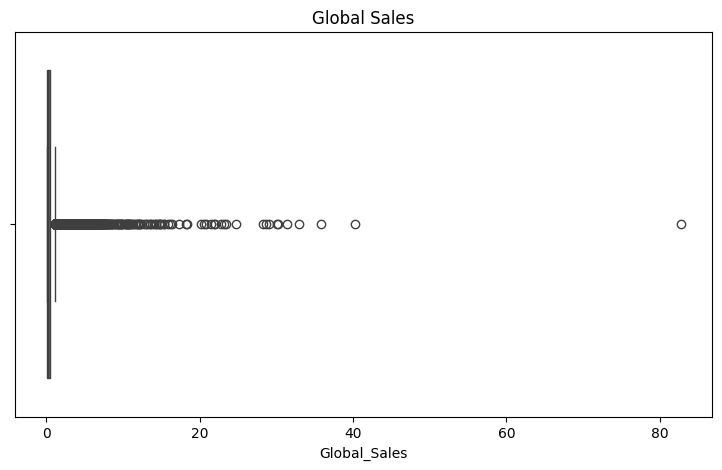

In [21]:
# check outliers : Vg that have performed extremely well
# Create a box plot
plt.figure(figsize=(9, 5))
sns.boxplot(x=sales_df['Global_Sales'])
plt.title('Global Sales')
plt.show()

* We can see that the vast majority of video games sales are very low, between 0 and 20 millions.
* We can notice a few outliers towards the top percentiles that have performed exceptionally well.
* The top selling video game worldwide shows astonishing performance, selling almost twice as much as the second video game. 

It is important to note that here the games are singled out by name. Video games published on different platforms will show a single result for each platform.
Let's see more details to see which license has sold best by grouping them by name :

In [36]:
# check most sold video games globally

top_vg = sales_df[['Name', 'Global_Sales','Publisher']].groupby(['Name', 'Publisher']).sum().reset_index().sort_values(by='Global_Sales', ascending=False)
top_vg = top_vg[['Name', 'Global_Sales', 'Publisher']]
top_vg.head(10)

,Name,Global_Sales,Publisher
11207,Wii Sports,82.74,Nintendo
3776,Grand Theft Auto V,55.92,Take-Two Interactive
9508,Super Mario Bros.,45.31,Nintendo
9902,Tetris,35.84,Nintendo
5665,Mario Kart Wii,35.82,Nintendo
11209,Wii Sports Resort,33.00,Nintendo
7477,Pokemon Red/Pokemon Blue,31.37,Nintendo
1267,Call of Duty: Modern Warfare 3,30.83,Activision
6839,New Super Mario Bros.,30.01,Nintendo
1263,Call of Duty: Black Ops II,29.72,Activision


* We have the confirmation that Wii Sports has sold exceptionally with approximately 30 millions sales more than the second (GTA V), representing the total sales of any game in the top 5 to 10
* Nintendo has published 70% of the 10 most selling games worldwide

Let's dig deeper and find the most-selling video games for each region :

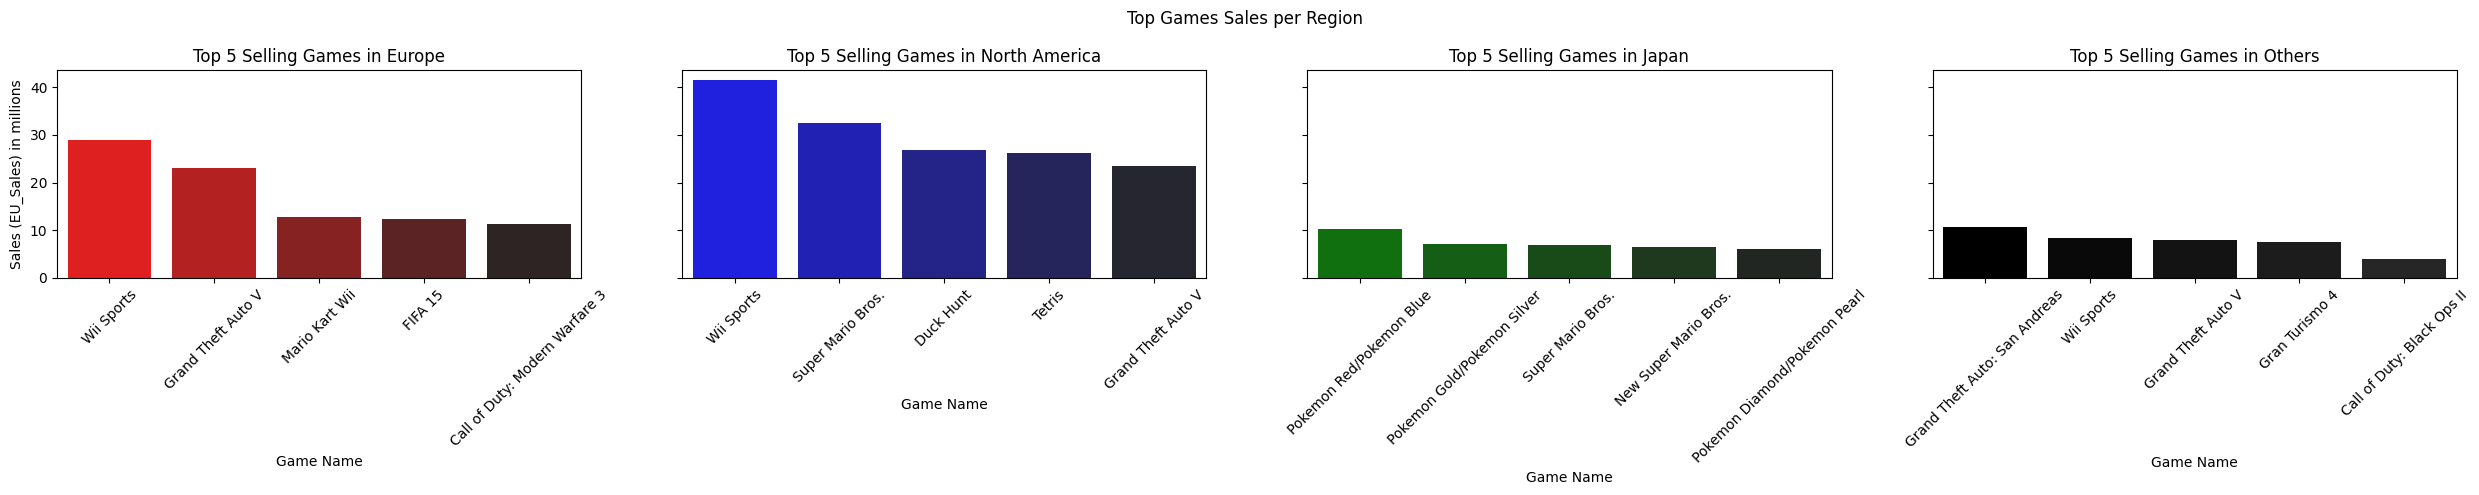

In [100]:
# create bar plot for the top N games in a specific region with styling
def plot_top_vg_by_region(region_sales, region_name, sales_column, top_n=5, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(25, 5))

    # define specific color palettes for each region
    color_palette = {
        'Europe': sns.dark_palette('red', n_colors=top_n, reverse=True),
        'North America': sns.dark_palette('blue', n_colors=top_n, reverse=True),
        'Japan': sns.dark_palette('green', n_colors=top_n, reverse=True),
        'Others': sns.dark_palette('black', n_colors=top_n, reverse=True)
    }


    if ax.legend_ is not None:
        ax.legend_.remove()
        
    # plot the bar chart
    sns.barplot(ax=ax, x='Name', y=sales_column, hue='Name', data=region_sales.head(top_n), palette=color_palette[region_name], dodge=False)
    
    ax.set_title(f'Top {top_n} Selling Games in {region_name}')
    ax.set_xlabel('Game Name')
    ax.set_ylabel(f'Sales ({sales_column}) in millions')
    ax.tick_params(axis='x', rotation=45)


# create subplots
fig, axes = plt.subplots(1, 4, figsize=(25, 5), sharey=True)
fig.suptitle('Top Games Sales per Region')

# Europe
top_vg_EU = sales_df[['Name', 'EU_Sales']].groupby('Name').sum().reset_index().sort_values(by='EU_Sales', ascending=False)
plot_top_vg_by_region(top_vg_EU, 'Europe', 'EU_Sales', top_n=5, ax=axes[0])

# North America
top_vg_NA = sales_df[['Name', 'NA_Sales']].groupby('Name').sum().reset_index().sort_values(by='NA_Sales', ascending=False)
plot_top_vg_by_region(top_vg_NA, 'North America', 'NA_Sales', top_n=5, ax=axes[1])

# Japan
top_vg_JP = sales_df[['Name', 'JP_Sales']].groupby('Name').sum().reset_index().sort_values(by='JP_Sales', ascending=False)
plot_top_vg_by_region(top_vg_JP, 'Japan', 'JP_Sales', top_n=5, ax=axes[2])

# Others
top_vg_others = sales_df[['Name', 'Other_Sales']].groupby('Name').sum().reset_index().sort_values(by='Other_Sales', ascending=False)
plot_top_vg_by_region(top_vg_others, 'Others', 'Other_Sales', top_n=5, ax=axes[3])

# show plot
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()



* We get more details about Wii Sports : while being the most-selling game in both Europe and North America, and close second in the "other" regions, it did not do that well in Japan
* Howerver, as we observed before, NA and EU representing together almost 80% of the global sales, it is natural that a common best-seller (here Wii Sports) is far ahead in a global ranking
* There is no (even remotely) similar set of games for the top of each region. Each region has different games being best seller

This confirms that if the objective is sales only, focusing on NA and/or EU might be a clever choice and this raises the question of regional preferences that we will answer later on.

## Platforms analysis

### 1. By Number of Games Released

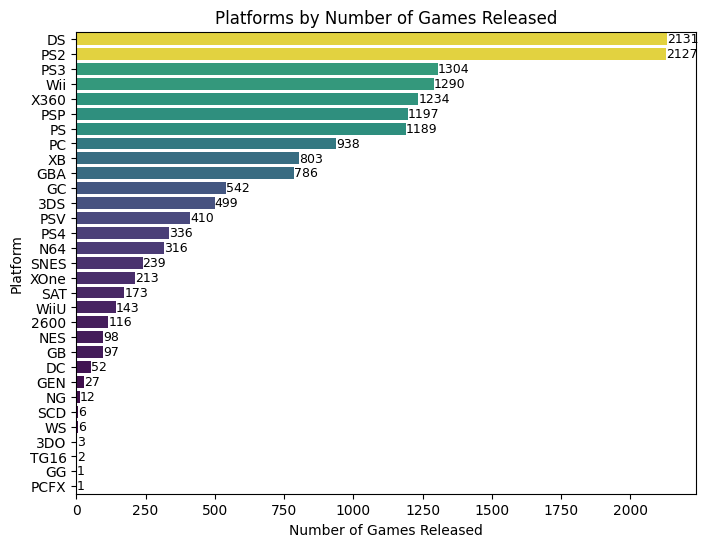

In [166]:
# count the number of games released for each platform
platform_counts = sales_df['Platform'].value_counts().reset_index()
platform_counts.columns = ['Platform', 'Number of Games Released']

plt.figure(figsize=(8, 6))
sns.barplot(x='Number of Games Released', y='Platform', hue= 'Number of Games Released', data=platform_counts, palette='viridis', legend= False)


# add annotations on each bar
for index, value in enumerate(platform_counts['Number of Games Released']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=9, color='black')

plt.xlabel('Number of Games Released')
plt.ylabel('Platform')
plt.title('Platforms by Number of Games Released')
plt.show()

* The DS and PS2 have seen the release of a huge number of games (2131 and 2127 respectively)
* The lowest percentiles are mostly occupied by old consoles that appeared in the 80's or 90's. The low number of games might be explained by technology capacities back then
* Contrary to its pre-21st century counterparts, the N64 has seen the release of a relatively big number of games (316)
* Although relatively recent (2012), the WiiU seems to have stayed somewhat of a niche (only 143 selling games), especially if we compare it to its ancestor the Wii that had 1290 selling games including the best-selling 'Wii Sports'

### 2. By Sales

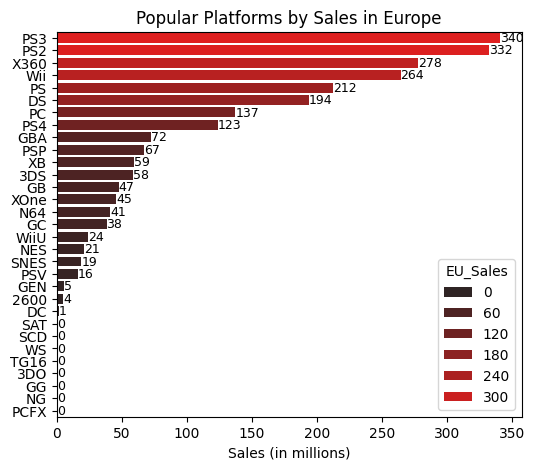

In [178]:
# group the games by platform and sort them by their sales in EU
EU_platform_sales = sales_df.groupby('Platform')['EU_Sales'].sum().reset_index()
EU_platform_sales = EU_platform_sales.sort_values(by='EU_Sales', ascending=False)

# set up palette
palette_EU = sns.dark_palette('red', as_cmap=True, reverse=False)

plt.figure(figsize=(6,5))
sns.barplot(x='EU_Sales', y='Platform', hue= 'EU_Sales', data=EU_platform_sales, palette=palette_EU)

# annotate values on each bar
for index, value in enumerate(EU_platform_sales['EU_Sales']):
    plt.text(value, index, f'{int(value)}', va='center', ha='left', fontsize=9)
    
plt.xlabel('Sales (in millions)')
plt.ylabel('')
plt.title('Popular Platforms by Sales in Europe')
plt.show()

* The 'Playstation' series have been very popular in Europe with the PS3 and PS2 occupying the first 2 ranks (with 340 and 332 million respectively) and the PS1 being 5th behind the Wii at 212 million
* The XBox 360 (X360) occupies the 3rd place (with 278 millions), leaving a 53 million dollars gap after the PS2

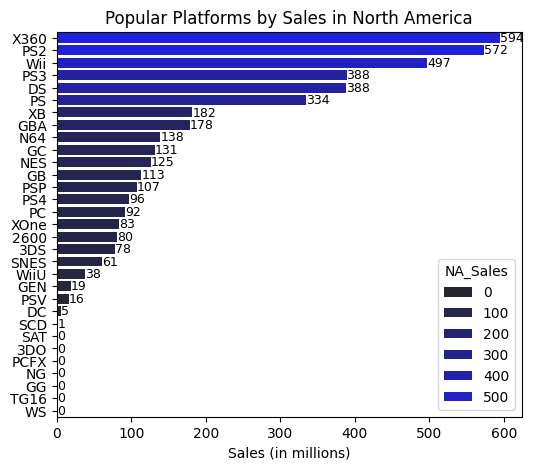

In [177]:
# group the games by platform and sort them by their sales in NA
NA_platform_sales = sales_df.groupby('Platform')['NA_Sales'].sum().reset_index()
NA_platform_sales = NA_platform_sales.sort_values(by='NA_Sales', ascending=False)

# set up palette
palette_NA = sns.dark_palette('blue', as_cmap=True, reverse=False)

plt.figure(figsize=(6,5))
sns.barplot(x='NA_Sales', y='Platform', hue= 'NA_Sales', data=NA_platform_sales, palette=palette_NA)

# annotate values on each bar
for index, value in enumerate(NA_platform_sales['NA_Sales']):
    plt.text(value, index, f'{int(value)}', va='center', ha='left', fontsize=9)
    
plt.xlabel('Sales (in millions)')
plt.ylabel('')
plt.title('Popular Platforms by Sales in North America')
plt.show()

* While the X360 has performed much better in NA than in Europe and therefore coming at first place (594 million) in the region, the PS3 however drops to the 3rd place comparing to Europe (with 388 million)
* PS2 remains a constant second in both regions (572 million in NA), and PS coming not too far behind the PS3 (with 334 million) confirms the huge popularity of the PS series in the West
* The Wii also performed quite well in NA, coming at 3rd in the region (497 million)

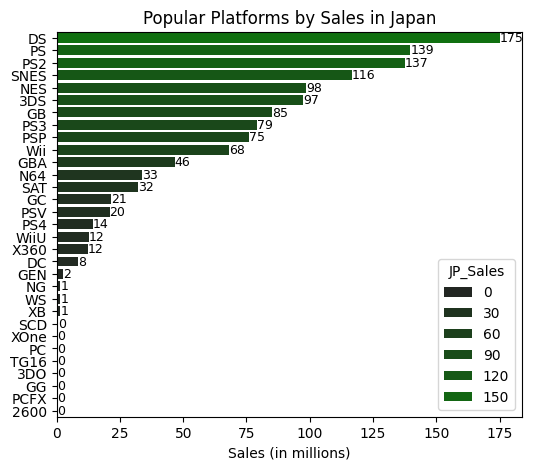

In [180]:
# group the games by platform and sort them by their sales in JP
JP_platform_sales = sales_df.groupby('Platform')['JP_Sales'].sum().reset_index()
JP_platform_sales = JP_platform_sales.sort_values(by='JP_Sales', ascending=False)

# set up palette
palette_JP = sns.dark_palette('green', as_cmap=True, reverse=False)

plt.figure(figsize=(6,5))
sns.barplot(x='JP_Sales', y='Platform', hue= 'JP_Sales', data=JP_platform_sales, palette=palette_JP)

# annotate values on each bar
for index, value in enumerate(JP_platform_sales['JP_Sales']):
    plt.text(value, index, f'{int(value)}', va='center', ha='left', fontsize=9)
    
plt.xlabel('Sales (in millions)')
plt.ylabel('')
plt.title('Popular Platforms by Sales in Japan')
plt.show()

As expected, platforms' popularity in Japan is much different :

  * The Nintendo DS occupies 1st place by a great margin (175 million)
  * While the PS are close 2nd and 3rd (139M and 137M respectively), the more recent PS3 doesn't seem to have a great popularity with only 79 million worth of sales, dropping to a 8th place
  * The 1990's SNES and the even older 1983's NES show pretty surprising results with a 4th and 5th respective place (116M and 198M)

Unlike the other parts of the world, Japan seems to prefer (or at least show a great interest in) older platforms and consoles

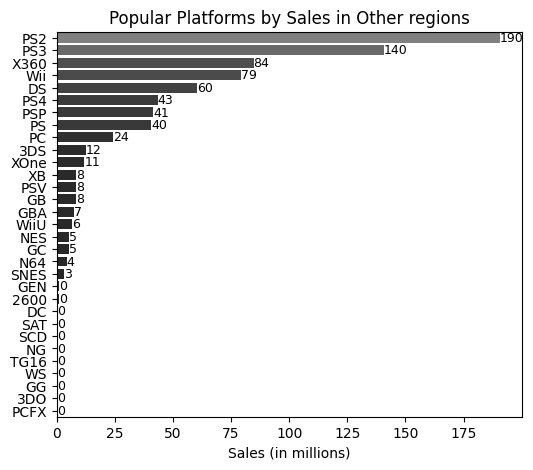

In [182]:
# group the games by platform and sort them by their sales in other regions
Other_platform_sales = sales_df.groupby('Platform')['Other_Sales'].sum().reset_index()
Other_platform_sales = Other_platform_sales.sort_values(by='Other_Sales', ascending=False)

# set up palette
palette_Other = sns.dark_palette('grey', as_cmap=True, reverse=False)

plt.figure(figsize=(6,5))
sns.barplot(x='Other_Sales', y='Platform', hue= 'Other_Sales', data=Other_platform_sales, palette=palette_Other, legend=False)

# annotate values on each bar
for index, value in enumerate(Other_platform_sales['Other_Sales']):
    plt.text(value, index, f'{int(value)}', va='center', ha='left', fontsize=9)
    
plt.xlabel('Sales (in millions)')
plt.ylabel('')
plt.title('Popular Platforms by Sales in Other regions')
plt.show()

* In the other regions of the world, we have a constant popularity of the (at least recent) PS Series with the PS2 standing proudly at the 1st place (with 190 million) followed by its successor the PS3 with a not-so-shy 140 million to come up at 2nd place

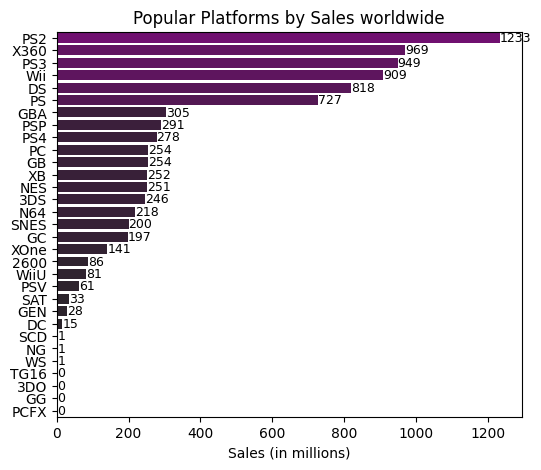

In [183]:
# group the games by platform and sort them by their sales worldwide
Global_platform_sales = sales_df.groupby('Platform')['Global_Sales'].sum().reset_index()
Global_platform_sales = Global_platform_sales.sort_values(by='Global_Sales', ascending=False)

# set up palette
palette_Global = sns.dark_palette('purple', as_cmap=True, reverse=False)

plt.figure(figsize=(6,5))
sns.barplot(x='Global_Sales', y='Platform', hue= 'Global_Sales', data=Global_platform_sales, palette=palette_Global, legend=False)

# annotate values on each bar
for index, value in enumerate(Global_platform_sales['Global_Sales']):
    plt.text(value, index, f'{int(value)}', va='center', ha='left', fontsize=9)
    
plt.xlabel('Sales (in millions)')
plt.ylabel('')
plt.title('Popular Platforms by Sales worldwide')
plt.show()

* Overall and not so surprisingly, the PS2 is the most popular platform (1.23B), followed with a peloton composed by the X360 (969M), the PS3 (949M) and the Wii (909M)

* Japan is the only region where the customers don't really use the Wii. This starts to explain why although having remarkable sales globally, Wii Sports did not do that well in Japan
* All (EU, NA, Other) regions except Japan have the same top 4 platforms (although in different order). We can guess here cultural similarities in taste regarding video games and their platforms.

## Genre analysis

Even though we talked a bit of the popular genres in the 'Regional preferences' section, let's dive a bit deeper in this analysis by focusing on a more global Point-Of-View:

### 1. Popular Game genres

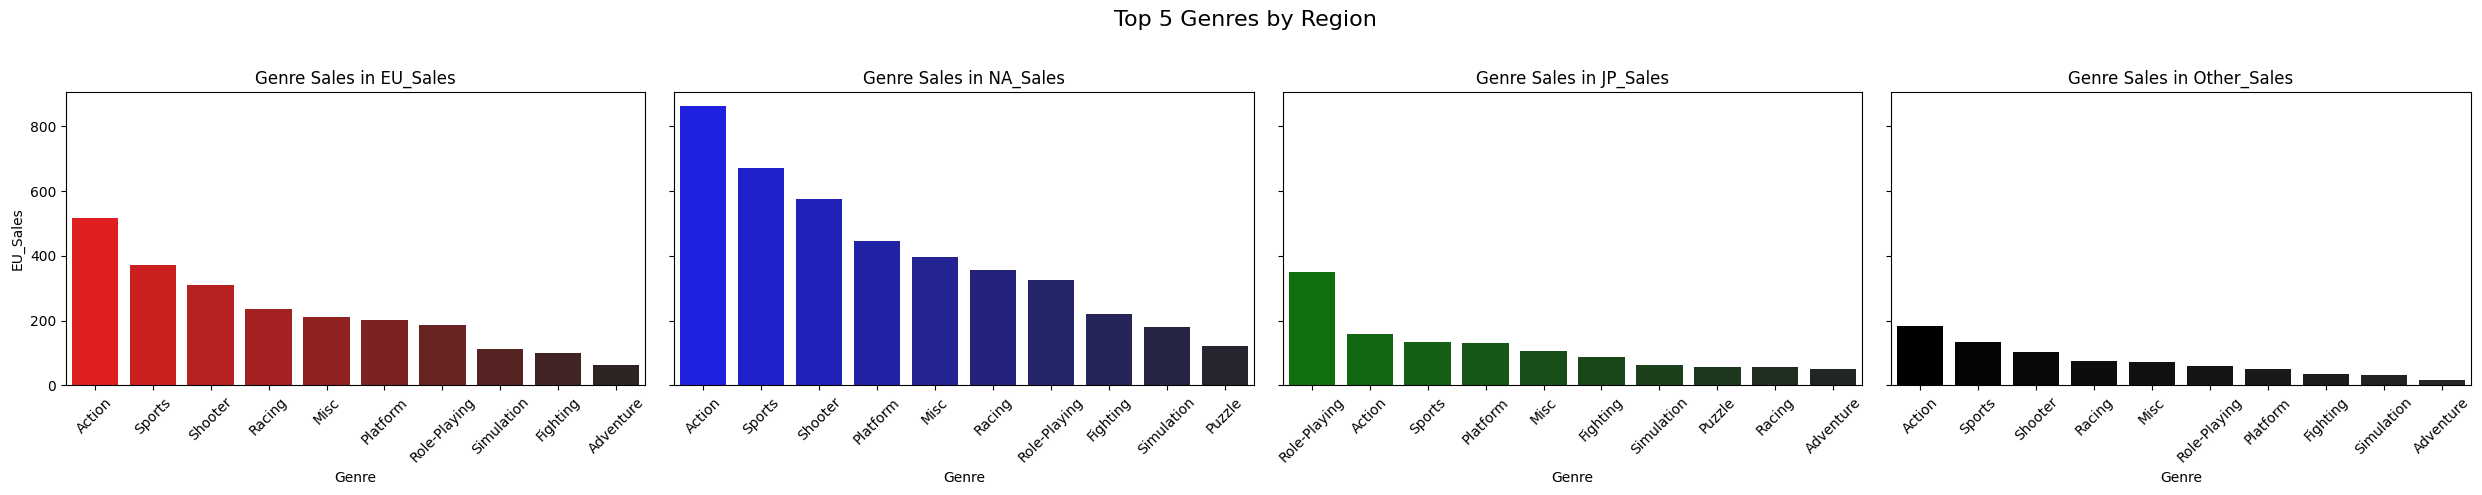

In [184]:
# create subplots for each region
fig, axes = plt.subplots(1, 4, figsize=(25, 5), sharey=True)
fig.suptitle('Top 5 Genres by Region', fontsize=16)

# define color palettes
region_palettes = {
    'EU_Sales': sns.dark_palette("red", 10, reverse=True),
    'NA_Sales': sns.dark_palette("blue", 10, reverse=True),
    'JP_Sales': sns.dark_palette("green", 10, reverse=True),
    'Other_Sales': sns.dark_palette("black", 10, reverse=True),
}
# iterate over each region
for i, (region, palette) in enumerate(region_palettes.items()):
    # Filter data for the specific region
    region_data = sales_df[['Genre', region]]
    
    # Get the top 5 genres for the region
    top_genres = region_data.groupby('Genre').sum().nlargest(10, region).reset_index()

    # Plot genre sales for the region
    ax = axes[i]
    sns.barplot(ax=ax, x='Genre', y=region, hue='Genre', data=top_genres, palette=palette)
    ax.set_title(f'Genre Sales in {region}')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

* Wii Sports not selling so much in Japan is mostly due to the platform choice, since the 'Sports' genre occupies the 3rd spot in Japan
* Again, EU, NA and the other regions share a visible similarity in tastes. They have the exact same top 3 (Action, Sports, Shooter), and their top 10 is almost perfectly similar too
* 'Action' and 'Sports' genre are present everywhere in the world in the top 3 of each region. These seem to be very bankable and safe genres to publish
* Although it doesn't perform especially well in other places, the 'Role-Playing' genre is far ahead at 1st place in Japan. This is important to note if one wants to publish a game of such genre

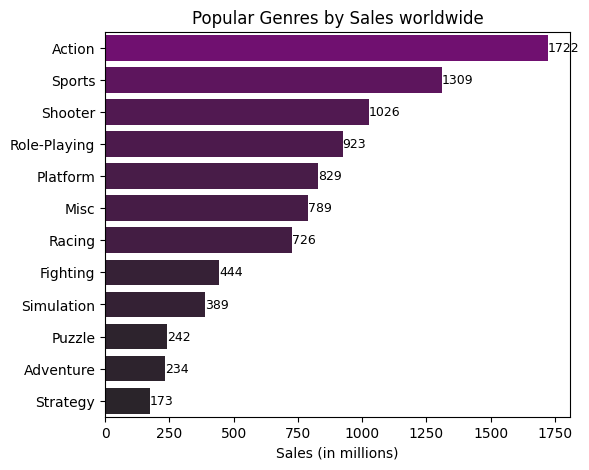

In [185]:
# group the games by platform and sort them by their sales worldwide
Global_genre_sales = sales_df.groupby('Genre')['Global_Sales'].sum().reset_index()
Global_genre_sales = Global_genre_sales.sort_values(by='Global_Sales', ascending=False)

# set up palette
palette_Global = sns.dark_palette('purple', as_cmap=True, reverse=False)

plt.figure(figsize=(6,5))
sns.barplot(x='Global_Sales', y='Genre', hue= 'Global_Sales', data=Global_genre_sales, palette=palette_Global, legend=False)

# annotate values on each bar
for index, value in enumerate(Global_genre_sales['Global_Sales']):
    plt.text(value, index, f'{int(value)}', va='center', ha='left', fontsize=9)
    
plt.xlabel('Sales (in millions)')
plt.ylabel('')
plt.title('Popular Genres by Sales worldwide')
plt.show()

* Unsuprisingly, the 'Action' genre is the most popular worldwide (1722 million), followed by 'Sports' (1309M) and 'Shooter' (1026)
* Regardless of geographical location, 'Action' and 'Sports' seem to be constantly bankable genres
* Similarly to the platforms' analysis, Japan shows many differences in the genres that sell compared to the rest of the world
    * 'Role-Playing' is by far the most popular genre there while being towards the end of the top 10 in the rest of the world
    * Despite being quite popular in the rest of the world, 'Shooter' games have the lowest sales in Japan
* Strategy games do not seem to perform well anywhere in the world

### 2. Evolution of Game Genres from 1980 to 2020

<Axes: title={'center': 'Number of New Games Released'}, ylabel='Number of Games'>

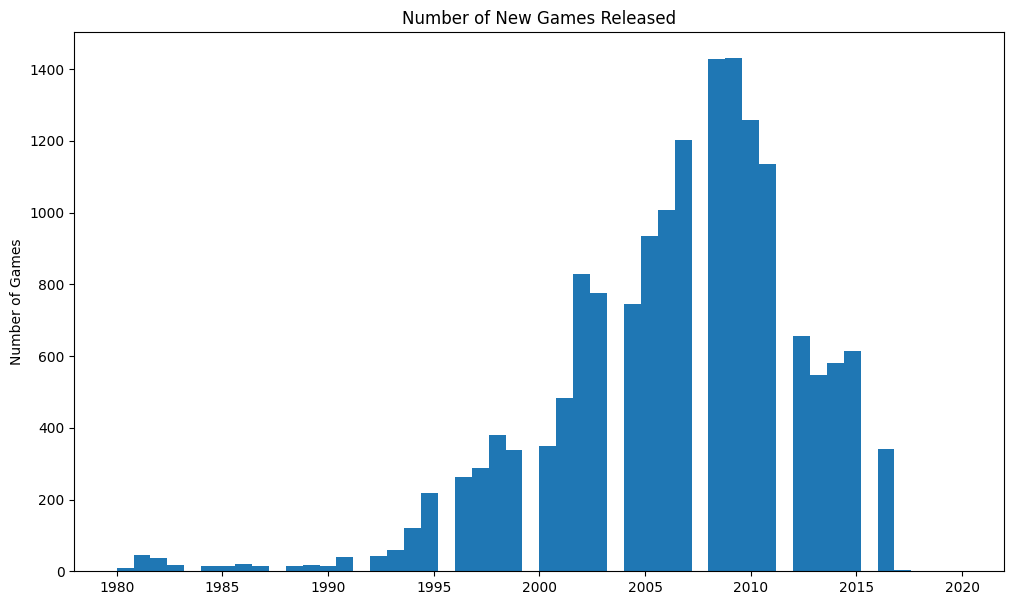

In [187]:
sales_df['Year'].plot(kind='hist',bins=50, figsize=(12,7),title='Number of New Games Released', ylabel= 'Number of Games')

* According to the dataset, there seems to have been a peak of game releases towards the end of the 2000's (esp. 2008) and the industry seems to be experiencing a decline since then
* We can notice two different periods based on the number of games released:
    * 1980 to 1995
    * 1996 to 2020

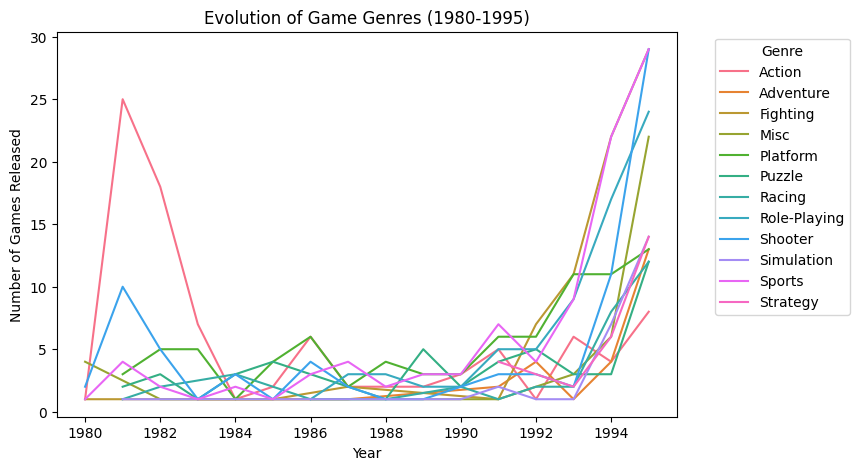

In [199]:
# Exclude games that were released on multiple platform and keep the first occurence of each game
filtered_df = sales_df.drop_duplicates(subset='Name', keep='first')
# Filter data for the years 1980 to 1995
filtered_df = sales_df[(sales_df['Year'].between(1980, 1995))]

# Group by Genre and Year, and count the number of games
genre_count_by_year = filtered_df.groupby(['Genre', 'Year']).size().reset_index(name='Number of Games Released')

# Plot the data
plt.figure(figsize=(8, 5))
sns.lineplot(x='Year', y='Number of Games Released', hue='Genre', data=genre_count_by_year)
plt.title('Evolution of Game Genres (1980-1995)')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

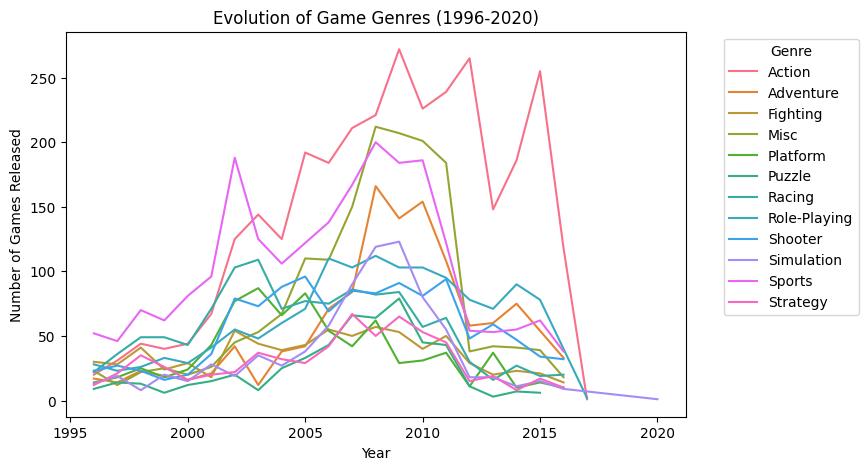

In [198]:
# Exclude games that were released on multiple platform and keep the first occurence of each game
filtered_df = sales_df.drop_duplicates(subset='Name', keep='first')
# Filter data for the years 1996 to 2020
filtered_df = sales_df[(sales_df['Year'].between(1996, 2020))]

# Group by Genre and Year, and count the number of games
genre_count_by_year = filtered_df.groupby(['Genre', 'Year']).size().reset_index(name='Number of Games Released')

# Plot the data
plt.figure(figsize=(8, 5))
sns.lineplot(x='Year', y='Number of Games Released', hue='Genre', data=genre_count_by_year)
plt.title('Evolution of Game Genres (1996-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

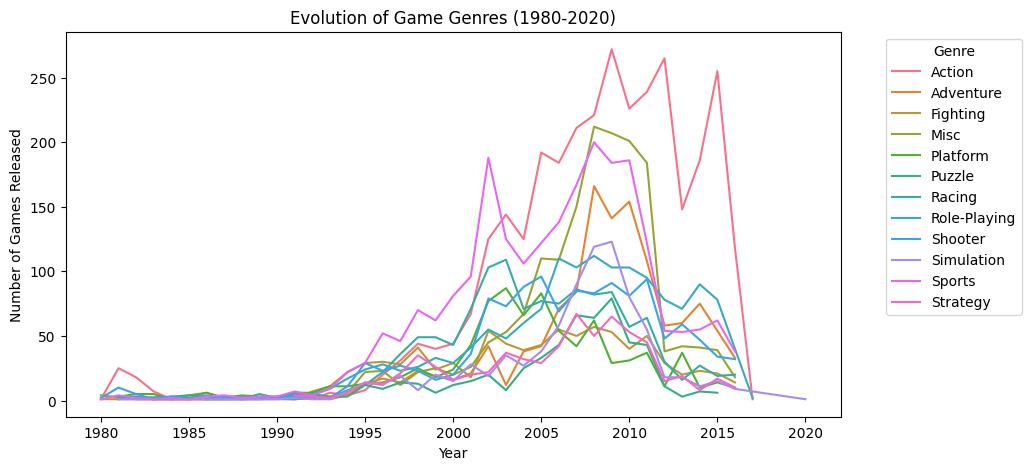

In [200]:
# Exclude games that were released on multiple platform and keep the first occurence of each game
filtered_df = sales_df.drop_duplicates(subset='Name', keep='first')
# Filter data for the years 1980 to 2020
filtered_df = sales_df[(sales_df['Year'].between(1980, 2020))]

# Group by Genre and Year, and count the number of games
genre_count_by_year = filtered_df.groupby(['Genre', 'Year']).size().reset_index(name='Number of Games Released')

# Plot the data
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Number of Games Released', hue='Genre', data=genre_count_by_year)
plt.title('Evolution of Game Genres (1980-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

Here is how the most released game genres have evolved since 1985 :

   * 1980 to 1984 : Action
   * 1996 to 2002 : Sports
   * 2003 to 2020 : Action

## Publishers' Analysis

### 1. Most Productive Publisher

In [210]:
# get the number of games preleased by the same publisher and filter only the top 3 publishers
prod_publisher = sales_df['Publisher'].value_counts().sort_values(ascending=False).reset_index()
prod_publisher.head(3)

,Publisher,count
0,Electronic Arts,1339
1,Activision,966
2,Namco Bandai Games,928


In [214]:
# get the genres of games released by EA
genre_EA = sales_df.loc[sales_df['Publisher'] == 'Electronic Arts', 'Genre'].value_counts().sort_values(ascending=False).reset_index()
genre_EA

,Genre,count
0,Sports,554
1,Action,182
2,Racing,159
3,Shooter,139
4,Simulation,116
5,Misc,43
6,Fighting,38
7,Strategy,37
8,Role-Playing,35
9,Platform,16


* The most productive publishers are EA, Activision and Namco Bandai
* EA has released over 1300 games with the majority of them being Sports games, followed by Action games (the most popular genres)